In [1]:
import pandas as pd
from pandas_profiling import ProfileReport
from sklearn.ensemble import RandomForestClassifier

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
activate_profiling = False
df_train = pd.read_csv("../data/data_train.csv")
df_test = pd.read_csv("../data/data_test.csv")
target = 'income'

In [3]:
df_train.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,0,77516,0,13,0,0,0,0,0,2174,0,40,0,0
1,50,1,83311,0,13,1,1,1,0,0,0,0,13,0,0
2,38,2,215646,1,9,2,2,0,0,0,0,0,40,0,0
3,53,2,234721,2,7,1,2,1,1,0,0,0,40,0,0
4,28,2,338409,0,13,1,3,2,1,1,0,0,40,1,0


In [4]:
if activate_profiling:
    profile = ProfileReport(df_train, title="Pandas Profiling Report")
    profile.to_file("../reports/train.html")
    profile = ProfileReport(df_test, title="Pandas Profiling Report")
    profile.to_file("../reports/test.html")

In [5]:
X_train = df_train.drop(target, axis=1)
y_train = df_train[target]

X_test = df_test.drop(target, axis=1)
y_test = df_test[target]

In [6]:
rf_clf = RandomForestClassifier()
rf_clf.fit(X_train, y_train)

RandomForestClassifier()

In [7]:
rf_clf.score(X_test, y_test)

0.8543087033965973

In [12]:
y_pred = rf_clf.predict(X_test)

In [29]:
from sklearn.metrics import f1_score, roc_auc_score, classification_report, confusion_matrix, roc_curve

In [13]:
f1_score(y_test, y_pred, zero_division=1)

0.6627807790730736

In [17]:
print(classification_report(y_test, y_pred, digits=3))

              precision    recall  f1-score   support

           0      0.884     0.931     0.907     12435
           1      0.731     0.606     0.663      3846

    accuracy                          0.854     16281
   macro avg      0.808     0.769     0.785     16281
weighted avg      0.848     0.854     0.849     16281



In [21]:
cm = confusion_matrix(y_test, y_pred)

[[11578   857]
 [ 1515  2331]]


[Text(0, 0.5, '0'), Text(0, 1.5, '1')]

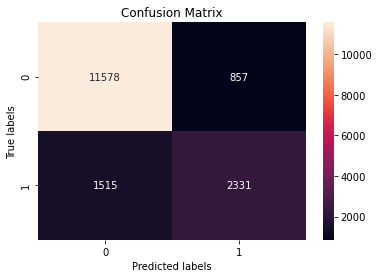

In [27]:
labels = ['0', '1']
print(cm)


ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax, fmt=".0f")

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)


In [28]:
roc_auc_score(y_test, rf_clf.predict_proba(X_test)[:,1])

0.9039751376946915

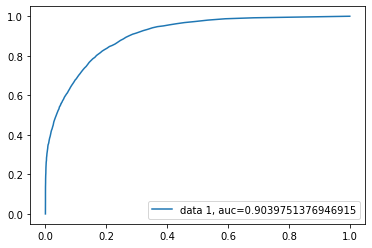

In [32]:
y_pred_proba = rf_clf.predict_proba(X_test)[::,1]
fpr, tpr, _ = roc_curve(y_test,  y_pred_proba)
auc = roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()